In [202]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [180]:
from tensorflow.keras.layers import Input,Conv2D,Flatten,Dense,Lambda
from tensorflow.keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import numpy as np
import matplotlib.pyplot as plt




In [181]:
image_size=[224,224]
train_path='/content/gdrive/MyDrive/malaria detection/Train'
test_path='/content/gdrive/MyDrive/malaria detection/Test'

In [182]:
cov_base=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [183]:
cov_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [184]:
model=models.Sequential()
model.add(cov_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',))
model.add(layers.Dense(2,activation='softmax'))

In [185]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [186]:
# don't train existing weights
for layer in cov_base.layers:
    layer.trainable = False
    

In [187]:
folders=glob(train_path+'/'+'*')

In [188]:
len(folders)

2

In [189]:
train_datagen=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [190]:
train_gen=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [191]:
train_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [192]:
test_gen=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [193]:
test_gen


In [194]:
history=model.fit_generator(train_gen,validation_data=test_gen,epochs=25,steps_per_epoch=len(train_gen),validation_steps=len(test_gen))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
13/13 [==============================] - 16s 1s/step - loss: 0.7604 - accuracy: 0.5896 - val_loss: 0.7049 - val_accuracy: 0.6791
Epoch 2/25
13/13 [==============================] - 14s 1s/step - loss: 0.6350 - accuracy: 0.6413 - val_loss: 1.0218 - val_accuracy: 0.6791
Epoch 3/25
13/13 [==============================] - 14s 1s/step - loss: 0.5645 - accuracy: 0.7350 - val_loss: 0.1295 - val_accuracy: 0.9478
Epoch 4/25
13/13 [==============================] - 14s 1s/step - loss: 0.1073 - accuracy: 0.9620 - val_loss: 0.1641 - val_accuracy: 0.9403
Epoch 5/25
13/13 [==============================] - 14s 1s/step - loss: 0.0723 - accuracy: 0.9783 - val_loss: 0.0982 - val_accuracy: 0.9627
Epoch 6/25
13/13 [==============================] - 14s 1s/step - loss: 0.0446 - accuracy: 0.9892 - val_loss: 0.0980 - val_accuracy: 0.9627
Epoch 7/25
13/13 [==============================] - 14s 1s/step - loss: 0.0686 - accuracy: 0.9824 - val_loss: 0.0831 - val_accuracy: 0.9776
Epoch 8/25
13/13 [==

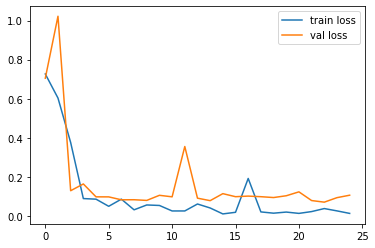

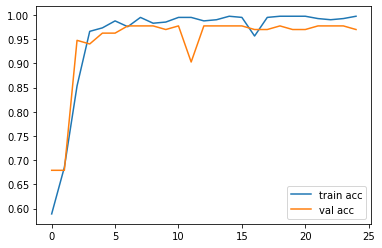

<Figure size 432x288 with 0 Axes>

In [195]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [196]:
from keras.models import load_model

In [205]:
model.save('vgg19_mal4.h5')

In [198]:
from keras.preprocessing import image

In [206]:
model=load_model('vgg19_mal4.h5')

In [209]:
img=image.load_img('/content/drive/MyDrive/malaria detection/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_191.png',target_size=(224,224))

In [210]:
img_tensor=image.img_to_array(img)

In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_tensor.shape

In [211]:
img_ten=np.expand_dims(img_tensor,axis=0)

In [212]:
img_ten/=255


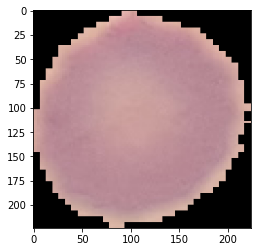

In [220]:
plt.imshow(img_ten[0])
plt.show()

In [214]:
img_ten.shape

(1, 224, 224, 3)

In [213]:
model.predict(img_ten)

array([[0.00407434, 0.99592566]], dtype=float32)

In [215]:
a=np.argmax(model.predict(img_ten), axis=1)

In [216]:
a

array([1])

In [ ]:
a

In [221]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
